In [1]:
import deepxde as dde

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term


2023-10-27 07:43:29.522977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:43:29.530896: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:43:29.531242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Enable just-in-time compilation with XLA.




In [2]:
fname_train = "./examples/dataset/dataset.train"
fname_test = "./examples/dataset/dataset.test"

In [3]:
data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

In [4]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

In [5]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
Building feed-forward neural network...
'build' took 0.048110 s



/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-10-27 07:45:36.527067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 07:45:36.529027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:45:36.529351: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have be

'compile' took 0.716512 s



2023-10-27 07:45:37.091177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:45:37.091881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:45:37.091943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2023-10-27 07:45:37.092324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:45:37.092378: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value sett

Initializing variables...
Training model...



2023-10-27 07:45:38.279389: I tensorflow/compiler/jit/xla_compilation_cache.cc:478] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss    Test loss     Test metric   
0         [3.82e-01]    [4.01e-01]    [8.87e-01]    
1000      [7.23e-03]    [7.34e-03]    [1.20e-01]    
2000      [5.73e-03]    [6.08e-03]    [1.09e-01]    
3000      [5.23e-03]    [5.66e-03]    [1.05e-01]    
4000      [4.93e-03]    [5.44e-03]    [1.03e-01]    
5000      [4.81e-03]    [5.31e-03]    [1.02e-01]    
6000      [4.76e-03]    [5.24e-03]    [1.01e-01]    
7000      [4.74e-03]    [5.22e-03]    [1.01e-01]    
8000      [4.73e-03]    [5.23e-03]    [1.01e-01]    
9000      [4.71e-03]    [5.22e-03]    [1.01e-01]    
10000     [4.69e-03]    [5.22e-03]    [1.01e-01]    
11000     [4.67e-03]    [5.21e-03]    [1.01e-01]    
12000     [4.61e-03]    [5.15e-03]    [1.00e-01]    
13000     [4.72e-03]    [5.04e-03]    [9.95e-02]    
14000     [2.68e-03]    [3.28e-03]    [8.02e-02]    
15000     [2.35e-03]    [2.72e-03]    [7.31e-02]    
16000     [1.33e-03]    [2.47e-03]    [6.96e-02]    
17000     [6.78e-04]    [1.72e-03]    [5.80e-0

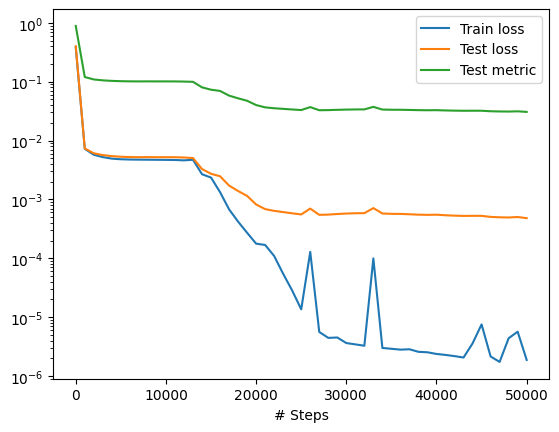

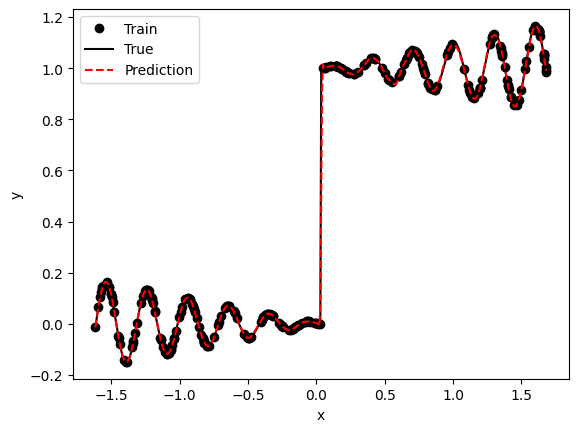

In [6]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

In [7]:
import deepxde as dde

데이터 속 내제되어 있는 함수를 근사화 해보자

# 데이터 불러오기

In [8]:
fname_train = "./examples/dataset/dataset.train"
fname_test = "./examples/dataset/dataset.test"

In [9]:
data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

In [10]:
data

# 구현

In [11]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

In [12]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
Building feed-forward neural network...
'build' took 0.045639 s

'compile' took 0.151038 s

Initializing variables...
Training model...



/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-10-27 08:11:15.537369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 08:11:15.537700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 08:11:15.537993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 08:11:15.538464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961

Step      Train loss    Test loss     Test metric   
0         [8.90e-01]    [9.08e-01]    [1.33e+00]    
1000      [9.17e-03]    [9.06e-03]    [1.33e-01]    
2000      [6.30e-03]    [6.59e-03]    [1.14e-01]    
3000      [5.57e-03]    [5.98e-03]    [1.08e-01]    
4000      [5.22e-03]    [5.72e-03]    [1.06e-01]    
5000      [4.97e-03]    [5.50e-03]    [1.04e-01]    
6000      [4.84e-03]    [5.35e-03]    [1.02e-01]    
7000      [4.78e-03]    [5.27e-03]    [1.02e-01]    
8000      [4.76e-03]    [5.23e-03]    [1.01e-01]    
9000      [4.75e-03]    [5.18e-03]    [1.01e-01]    
10000     [4.74e-03]    [5.12e-03]    [1.00e-01]    
11000     [4.74e-03]    [5.07e-03]    [9.97e-02]    
12000     [4.72e-03]    [5.00e-03]    [9.90e-02]    
13000     [4.72e-03]    [4.97e-03]    [9.87e-02]    
14000     [4.72e-03]    [4.97e-03]    [9.87e-02]    
15000     [4.71e-03]    [4.95e-03]    [9.86e-02]    
16000     [4.70e-03]    [4.95e-03]    [9.85e-02]    
17000     [4.75e-03]    [5.05e-03]    [9.95e-0

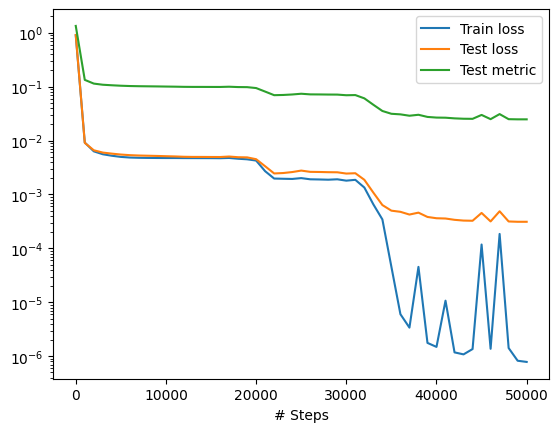

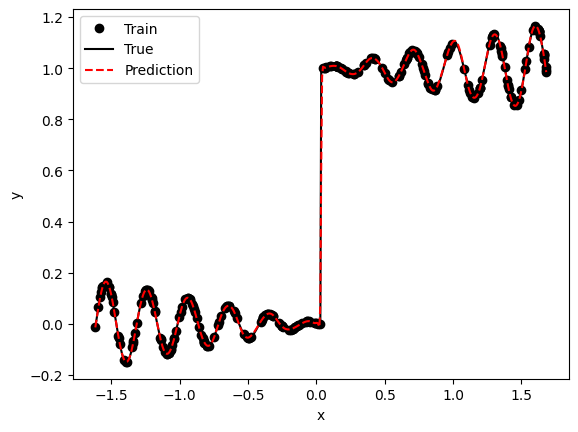

In [13]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

더 학습하면 토폴에 어떻게 뜰지 확인해보자

In [14]:
losshistory2, train_state2 = model.train(iterations=100000)

Training model...

Step      Train loss    Test loss     Test metric   
50000     [7.84e-07]    [3.11e-04]    [2.47e-02]    


2023-10-27 08:13:34.029211: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1750] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


51000     [1.31e-04]    [4.28e-04]    [2.90e-02]    
52000     [7.47e-07]    [3.33e-04]    [2.55e-02]    
53000     [8.41e-07]    [3.47e-04]    [2.61e-02]    
54000     [6.91e-07]    [3.56e-04]    [2.64e-02]    
55000     [2.74e-06]    [3.66e-04]    [2.68e-02]    
56000     [7.31e-07]    [3.71e-04]    [2.70e-02]    
57000     [2.45e-05]    [4.03e-04]    [2.81e-02]    
58000     [1.01e-06]    [3.95e-04]    [2.78e-02]    
59000     [7.33e-07]    [3.94e-04]    [2.78e-02]    
60000     [1.41e-06]    [4.06e-04]    [2.82e-02]    
61000     [6.09e-07]    [4.16e-04]    [2.86e-02]    
62000     [1.40e-06]    [4.24e-04]    [2.89e-02]    
63000     [3.41e-05]    [4.92e-04]    [3.11e-02]    
64000     [3.53e-06]    [4.49e-04]    [2.97e-02]    
65000     [3.00e-05]    [4.58e-04]    [3.00e-02]    
66000     [1.34e-05]    [4.67e-04]    [3.03e-02]    
67000     [4.84e-06]    [4.53e-04]    [2.98e-02]    
68000     [2.41e-06]    [4.64e-04]    [3.02e-02]    
69000     [5.32e-07]    [4.52e-04]    [2.98e-0

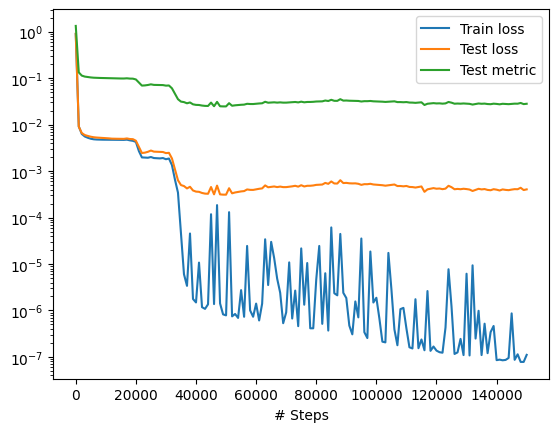

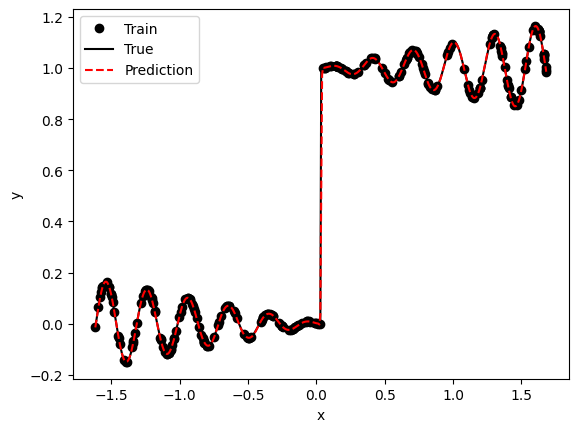

In [15]:
dde.saveplot(losshistory2, train_state2, issave=False, isplot=True)

여기서도 train dataset에 대한 과적합이 있지만 test loss, test metrics가 급격히 나빠지거나 하지는 않는것을 볼 수 있다.